# A Comprehensive Data Analysis of a University WhatsApp Ride-Share Group Chat

##Objectives


1.   Overall Frequency of Total Message on the Group over the Days.
2.   Most Active Days over the period.
3.   Number of People who haven't used the Group Yet.
4.   Top 10 Users of the Group
5.   Most active days, most active hours, most active months.
6.   Words used the most in Messages.
7.   Which Place is most Visited by Students?
8.   What else the group is used for?


##### *Author* : [Aniket Bharthi](https://www.linkedin.com/in/aniketbharthi/)
##### This project is insipred by a similar project done by [Tushar Nankani](https://www.linkedin.com/in/tusharnankani/).
Check out his Github Page : https://github.com/tusharnankani/whatsapp-chat-data-analysis



## *Overview*
- Introduction
- Data Retrieval.
- Data Cleaning & Pre-processing.
- Exploratory Data Analysis
- Data Visualization.
- Objective 1.
- Objective 2.
- Objective 3.
- Summarizing the Inferences
- Conclusion

# *Introduction* :

* I recently encountered an impressive initiative by university students in Dallas, who created a WhatsApp group for ride-sharing. This group facilitates travel for students and other city residents by enabling them to share rides to common destinations, either by providing lifts or sharing cabs.

* This free initiative has significantly benefited students, graduates, and employees in the Dallas area, helping them save money and foster a sense of community through ride-sharing.

* The primary objective of my study is to determine the most frequented locations (excluding the university campus) and identify the peak travel times for these rides.

* Additionally, the analysis aims to discover the trending hotspots among students and determine the popular locations within this demographic.

# *Data retrieval* : (Step by Step Process)

###**Step 1 :** *Exporting the Data from WhatsApp*

####WhatsApp provides an Amazing feature to export the Group chat from whichever group you want. You can follow the steps below to export your data.

#### Step 1.1 : Open up your Group Chat & Click on its Description.
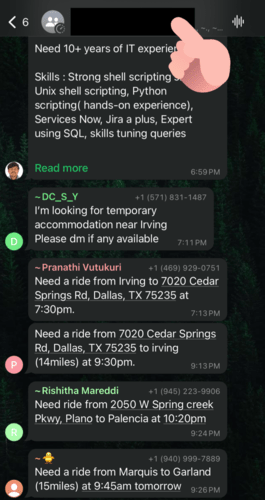

#### Step 1.2 : Go to the Bottom of the Description and you should find this option to export your chats.

#### NOTE:
- Without media: exports about **40k messages**
- With media: exports about **10k messages along with pictures/videos**
- While exporting data, **avoid including media files** because if the number of media files is greater than certain figure then not all the media files are exported.

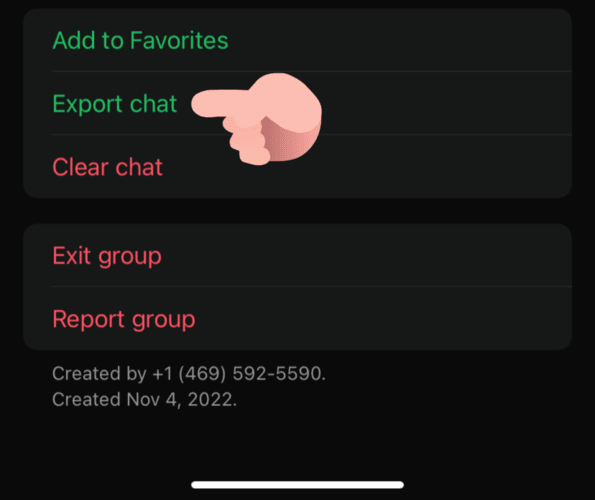

###**Step 2 :** *Importing the Data to Google Colab*


#### Step 2.1 : This exported chat would be in compressed zip format and it will give you an option to choose where to export the data. Typically i would suggest to export it to Your Cloud or Google Drive so that you can access the data from there.

#### Step 1.4 : Decompress the Data and Import it to Colab notebook by uploading it in the files.
On the left side taskbar of your notebook you can see a File Icon. click on it and then click on the upload icon to upload your chat data.
#### **Note :** The Data is in .txt Format.
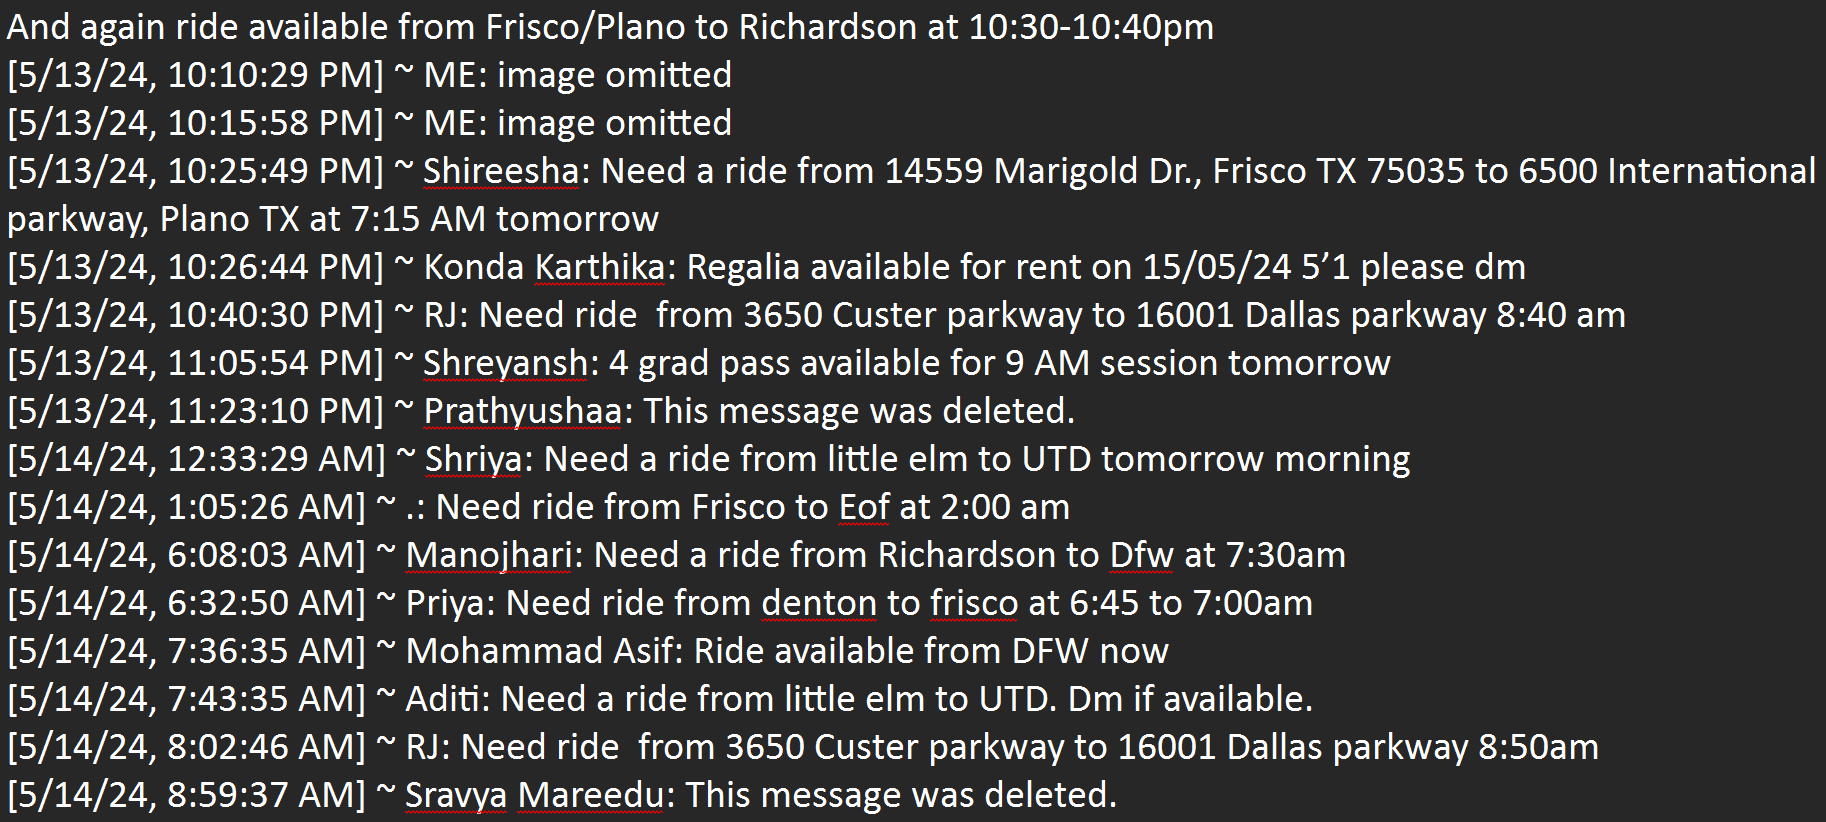

# *Data Cleaning & Pre-processing* :

## Importing Necessary Packages

We will be using :
1. **Regex (re)** to extract and manipulate strings based on specific patterns.
    - References:
        - [Regex - Python Docs](https://docs.python.org/3/library/re.html)
        - [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
        - [Regex Test - live](https://regexr.com/)
        - [Datetime Format](http://strftime.org/)
2. **pandas** for data analytics as it provides several funtions to work on your data
     - References:
        - [Pandas Docs](https://pandas.pydata.org/)
3. **matplotlib** and **seaborn** provides exceptional visualization capabilities which we would be using to present our data.
     - References:
        - [Matplotlib](https://matplotlib.org/)
        - [Seaborn](https://seaborn.pydata.org/)
4. **emoji** to deal with emojis.
    - References:
        - [Python Docs](https://pypi.org/project/emoji/)
        - [Emoji](https://github.com/carpedm20/emoji)
        - [EMOJI CHEAT SHEET](https://www.webfx.com/tools/emoji-cheat-sheet/)
5. **wordcloud** for the most used words.

In [2]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
!pip install emoji
import emoji
import itertools
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.9 MB/s eta 0:00:00


##### NOTE:
- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

## Importing the data & formatting it

####Refer to this Table for Understanding the Datatime formating Characters in Python
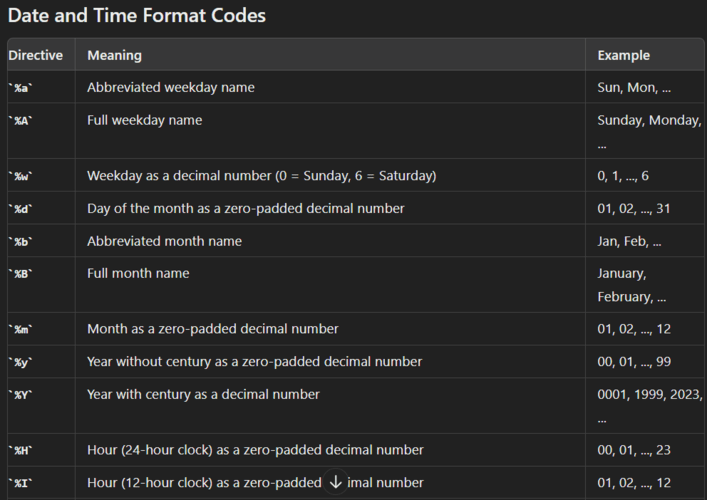

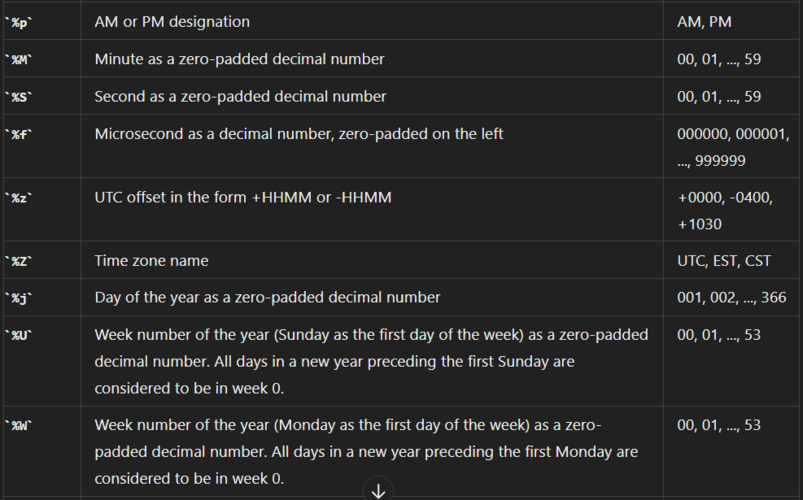


In [3]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''

    split_formats = {
        '12hr' : '[\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[\u202f]\s[APap][mM]]',
        '24hr' : '[\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{1,2}:\d{1,2}s[\u202f]\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%y, %I:%M:%S%p',
        '24hr' : '%m/%d/%y, %H:%M:%S',
        'custom': ''
    }

    date=[]
    name=[]
    message=[]
    test=[]
    with open(file, 'r',encoding="utf-8") as raw_data:
        # print(raw_data.read())

        raw_string=raw_data.read() #here, we read the file as a single string of characters

        #The data exported by WhatsApp consists of Unicode characters which need to be removed
        #So we encode the data in ASCII format and the decode it to remove Unicode characters
        string_encode = raw_string.encode("ascii", "ignore")
        raw_string = string_encode.decode().split('\n') # converting the list split by newline char. as one whole string as there can be multi-line messages
        #Now we do through each line to retrieve datetime, name and message.
        #there are mutiple lines which follow multiple pattern so we have to develop several cases.
        for i in range(len(raw_string)):
          split_dtm=raw_string[i].split(': ') #Here we split Username and Datetime from Message

          #Some lists are blank so we need to filter those out
          if len(split_dtm)>1 :
            if split_dtm[0] and split_dtm[0][0]=='[': #here we seperate datetime and name
              datetime_user=split_dtm[0].split(']')
              date.append(datetime_user[0][1:])
              name.append(datetime_user[1])

              if split_dtm[1]:
                message.append(split_dtm[1])
              else:
                message.append(' ')
          #Some line only contain message which are extension of previous message
          #So we check for them and add them to the previous Entry in Message lit
          elif len(split_dtm)==1:
              ext_msg=str(' '.join(split_dtm))
              message[-1]=message[-1]+ext_msg

        #We are creating a distionary to store this values so that we can create a dataframe from it.
        Data_dict={'Datetime':date,'Username':name,'Message':message}
        df=pd.DataFrame(Data_dict)

    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method
    df['Datetime'] = pd.to_datetime(df['Datetime'], format=datetime_formats[key])
    return df

In [4]:
df = rawToDf('/content/_chat.txt', '12hr')

##Basic Information about the dataset


In [5]:
df.head(10)

,Datetime,Username,Message
0,2022-11-04 12:12:35,UTD to DFW Rides,Messages and calls are end-to-end encrypted. N...
1,2022-11-04 12:12:35,+1(469)5925590,+1(469)5925590 created this group
2,2024-05-13 18:32:18,UTD to DFW Rides,You joined using this group's invite link
3,2024-05-13 18:32:18,UTD to DFW Rides,Disappearing messages were turned on. New mess...
4,2024-05-13 20:24:50,~Lavalika,Your security code with +1(469)8820457 changed.
5,2024-05-14 17:33:28,~Meghana Kolli,~Meghana Kolli joined using this group's invit...
6,2024-05-14 22:24:24,+918987909439,+918987909439 joined using this group's invite...
7,2024-05-14 22:46:31,+919155694820,+919155694820 joined using this group's invite...
8,2024-05-14 23:08:31,~Dinesh,~Dinesh joined using this group's invite link
9,2024-05-14 23:39:44,+918374867736,+918374867736 changed their phone number to a ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671 entries, 0 to 4670
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  4671 non-null   datetime64[ns]
 1   Username  4671 non-null   object        
 2   Message   4671 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 109.6+ KB


In [7]:
df.sample(10)

,Datetime,Username,Message
587,2024-07-12 13:51:20,~K,Need a ride marquis to Plano @3:40
1957,2024-08-13 08:03:39,+919014545977,+919014545977 joined using this group's invite...
269,2024-07-04 11:13:56,~Mounika,Ride available from McKinney/frisco/little elm...
1279,2024-07-28 13:44:46,~N,Need ride from dallas to denton at 4 pm
3775,2024-09-13 10:54:41,~NiVee,Need ride from marquis to frisco at 12pm
72,2024-05-23 20:11:15,~Rohit,~Rohit joined using this group's invite link
151,2024-06-08 21:08:33,~tejesh,~tejesh joined using this group's invite link
3531,2024-09-09 19:06:51,~RitheeshReddy,~RitheeshReddy joined using this group's invit...
2204,2024-08-17 20:48:27,~Vedant,Need a ride now from Frisco to Downtown Dallas...
1036,2024-07-22 20:03:31,~Raja Naidu,Need ride from 1921 n Plano Rd to Marquis at 1...


##Exploratory Data Analysis

###Adding Additional Columns for Visualizations.

In [8]:
df['Day'] = df['Datetime'].dt.strftime('%a')             #Abbreviated weekday name
df['Month'] = df['Datetime'].dt.strftime('%b')           #Abbreviated Month Name
df['Date'] = df['Datetime'].apply(lambda x: x.date())
df = df.drop(index=[0, 1, 2, 3])                            #We drop first 3 rows as those are outliers (The days group was created)

In [9]:
df

,Datetime,Username,Message,Day,Month,Date
4,2024-05-13 20:24:50,~Lavalika,Your security code with +1(469)8820457 changed.,Mon,May,2024-05-13
5,2024-05-14 17:33:28,~Meghana Kolli,~Meghana Kolli joined using this group's invit...,Tue,May,2024-05-14
6,2024-05-14 22:24:24,+918987909439,+918987909439 joined using this group's invite...,Tue,May,2024-05-14
7,2024-05-14 22:46:31,+919155694820,+919155694820 joined using this group's invite...,Tue,May,2024-05-14
8,2024-05-14 23:08:31,~Dinesh,~Dinesh joined using this group's invite link,Tue,May,2024-05-14
...,...,...,...,...,...,...
4666,2024-10-01 21:17:11,+1(909)9681153,Your security code with +1(909)9681153 changed.,Tue,Oct,2024-10-01
4667,2024-10-01 21:52:44,~Maddy,Need ride from Marqius at water to irving now,Tue,Oct,2024-10-01
4668,2024-10-01 21:55:29,~alexkimani1234,Contact card omitted,Tue,Oct,2024-10-01
4669,2024-10-01 22:33:39,~Hruthika Yerra,Need ride from denton to Richardson,Tue,Oct,2024-10-01


##Objective 1 : *Overall Frequency of Total Message on the Group over the Days*

In [10]:
df1 = df.copy()                                    # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['Message_count'] = [1] * df1.shape[0]          # adding extra helper column --> message_count.

df1 = df1.groupby('Date').count().reset_index()   # grouping by date; since plot is of frequency of messages --> no. of messages / day.

In [11]:
df1

,Date,Datetime,Username,Message,Day,Month,Message_count
0,2024-05-13,1,1,1,1,1,1
1,2024-05-14,5,5,5,5,5,5
2,2024-05-15,5,5,5,5,5,5
3,2024-05-16,7,7,7,7,7,7
4,2024-05-17,8,8,8,8,8,8
...,...,...,...,...,...,...,...
135,2024-09-27,40,40,40,40,40,40
136,2024-09-28,63,63,63,63,63,63
137,2024-09-29,47,47,47,47,47,47
138,2024-09-30,41,41,41,41,41,41


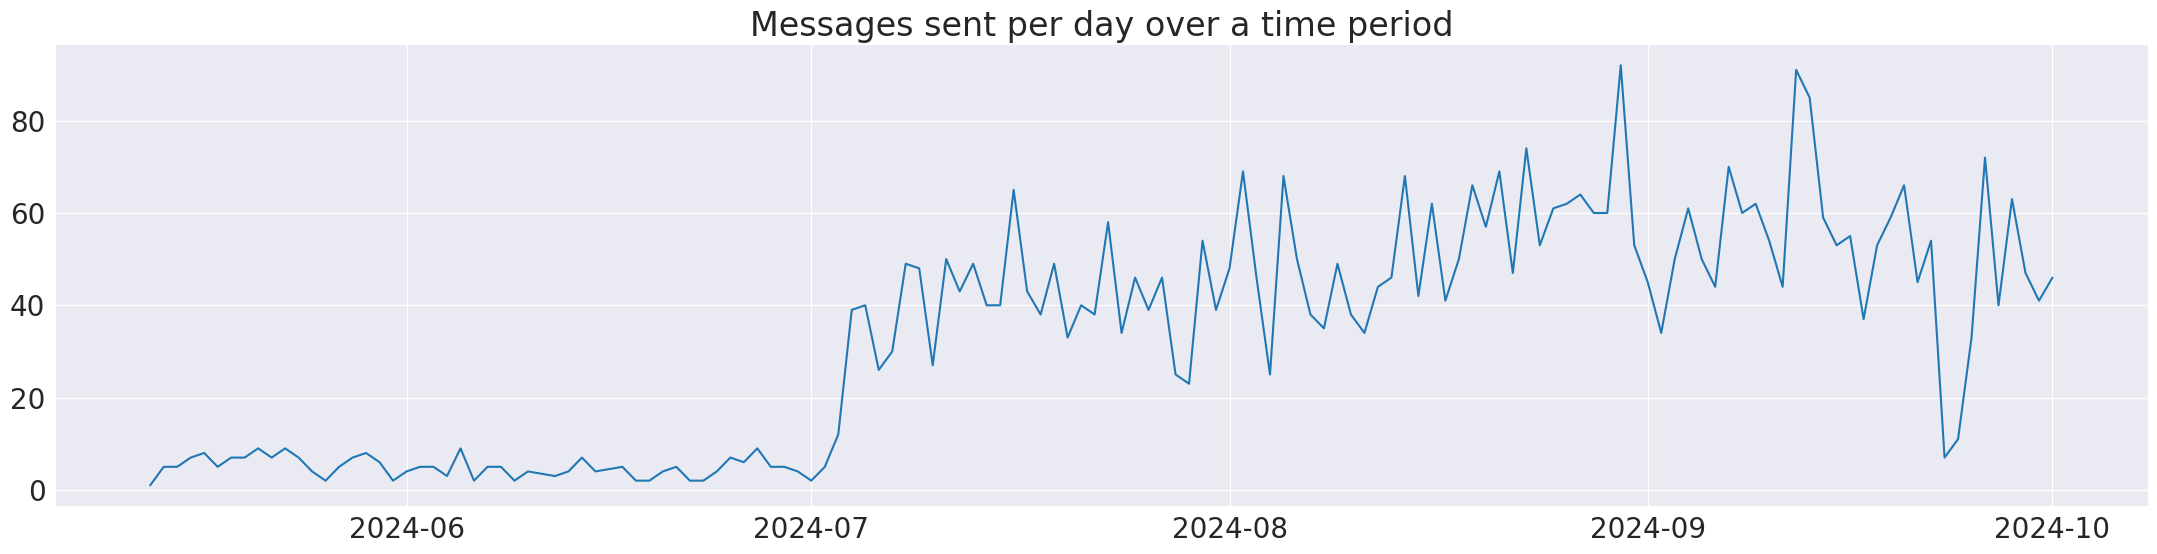

In [12]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`

plt.plot(df1.Date, df1.Message_count)
plt.title('Messages sent per day over a time period');

# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

##Objective 2 : *Most Active Days over the period*

In [13]:
top10days = df1.sort_values(by="Message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns = ['Datetime',	'Username',	'Message',	'Day',	'Month', 'index'], inplace=True) # dropping original indices.
top10days

,Date,Message_count
0,2024-08-30,92
1,2024-09-12,91
2,2024-09-13,85
3,2024-08-23,74
4,2024-09-26,72
5,2024-09-07,70
6,2024-08-02,69
7,2024-08-21,69
8,2024-08-14,68
9,2024-08-05,68


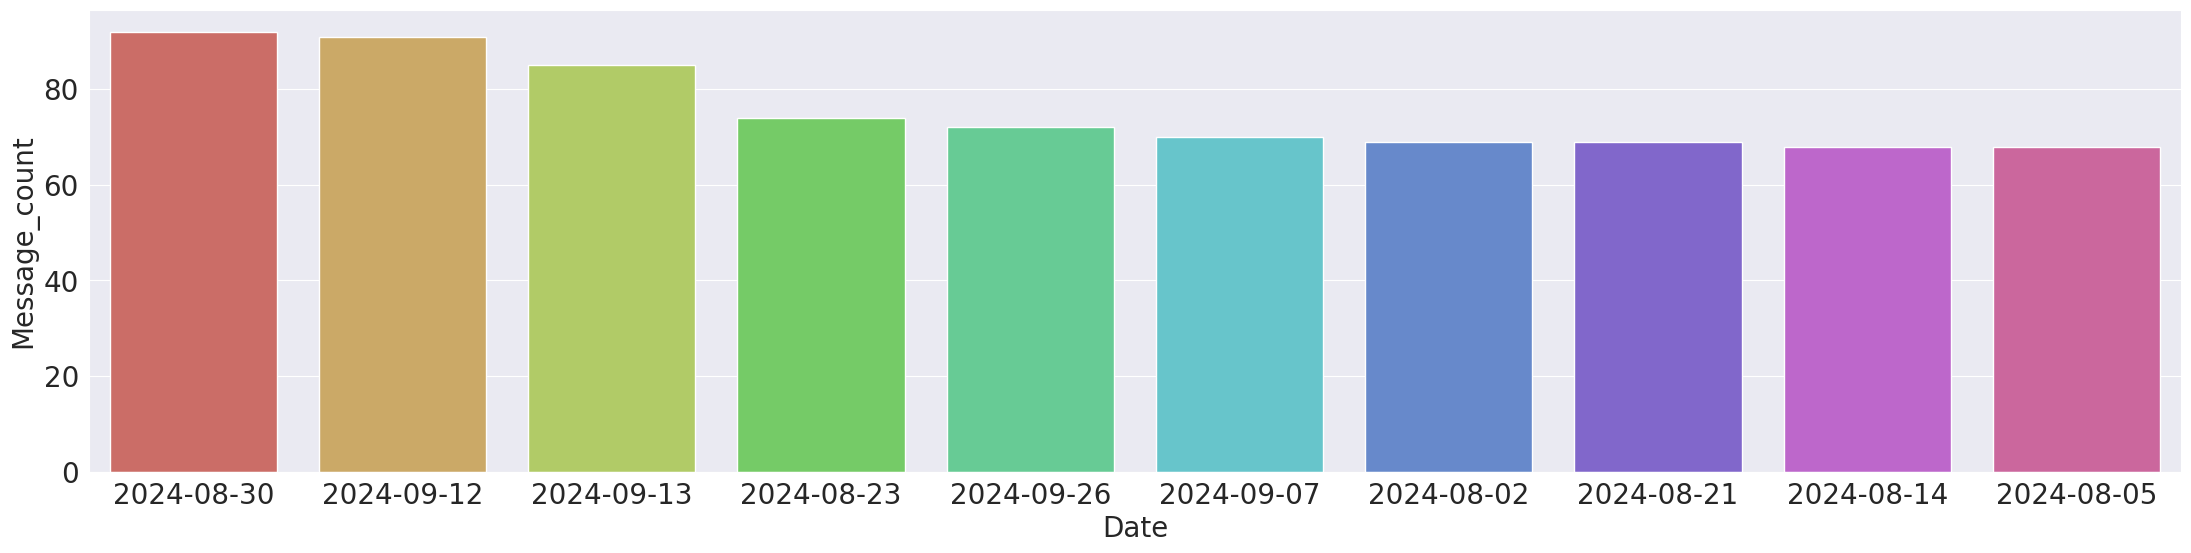

In [14]:
# A bar plot for top 10 days
sns.barplot(x=top10days.Date, y=top10days.Message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

##Objective 3 : Number of People who haven't used the Group Yet.

In [15]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.Username.unique())}")

print(f"Number of people who haven't sent even a single message on the group are {1025 - len(df.Username.unique())}")

Total number of people who have sent at least one message on the group are 840
Number of people who haven't sent even a single message on the group are 185


##Objective 4 : Top 10 Users of the Group

In [16]:
df1['Username']=df['Username']
top10user = df1.groupby("Username")["Message"].count().sort_values(ascending=False).head(10).reset_index()
top10user

,Username,Message
0,~vamsee,5
1,+1(214)5375651,3
2,~Abhi,3
3,+918374867736,3
4,~Sriram Kasuba,3
5,~Sam,3
6,+918555829980,2
7,+1(737)2029452,2
8,~At Uni,2
9,~Rohit,2


## Objective 5 : Most active days, most active hours, most active months.

###Pre-Processing the data

In [18]:
df3 = df.copy()
df3['message_count'] = [1] * df.shape[0]    # helper column to keep a count.

df3['hour'] = df3['Datetime'].apply(lambda x: int(x.hour))

grouped_by_time = df3.groupby('hour').count().reset_index().sort_values(by = 'hour')

In [20]:
grouped_by_time

,hour,Datetime,Username,Message,Day,Month,Date,message_count
0,0,95,95,95,95,95,95,95
1,1,64,64,64,64,64,64,64
2,2,24,24,24,24,24,24,24
3,3,22,22,22,22,22,22,22
4,4,34,34,34,34,34,34,34
5,5,31,31,31,31,31,31,31
6,6,112,112,112,112,112,112,112
7,7,182,182,182,182,182,182,182
8,8,205,205,205,205,205,205,205
9,9,333,333,333,333,333,333,333


### Which hour of the day are most messages exchanged?

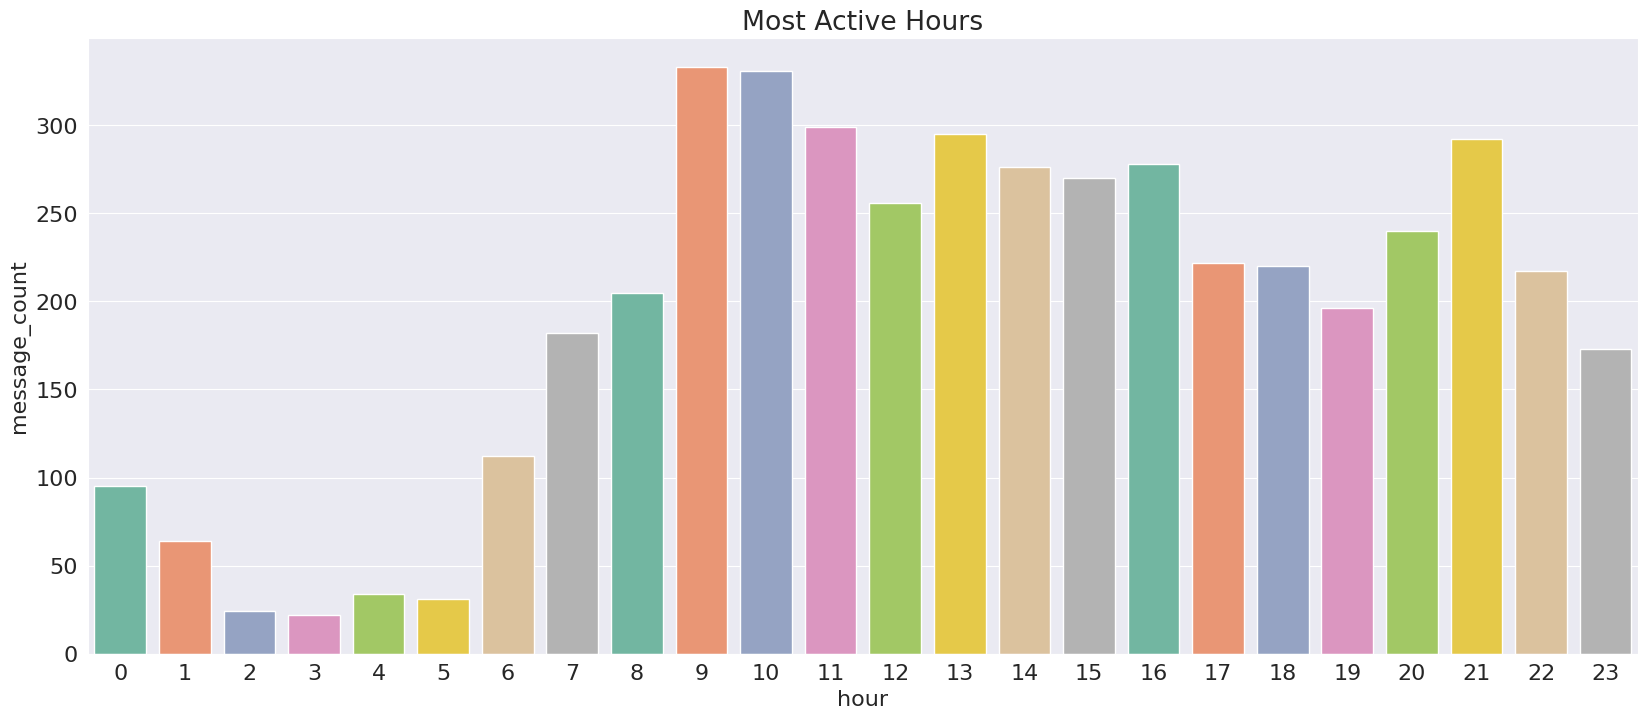

In [28]:
# Better Readablity
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x=grouped_by_time.hour, y=grouped_by_time.message_count,palette='Set2')
plt.title('Most Active Hours');

# Saving the plots;
plt.savefig('most_active_hours.svg', format = 'svg')

####*Inference* :
The Group is most active during 9 am to 11 am as that is the time when majority of the classes are conducted in university and also it's the time when people travel for work.

### *Pre-processing weekdays and months*

In [31]:
Days_Dict={'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':0, 'Sun':0}
Months_Dict={'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}
Days = df3['Day'].tolist()
Months = df3['Month'].tolist()

for Value in range(len(Days)):
  Days_Dict[Days[Value]]+=1
  Months_Dict[Months[Value]]+=1

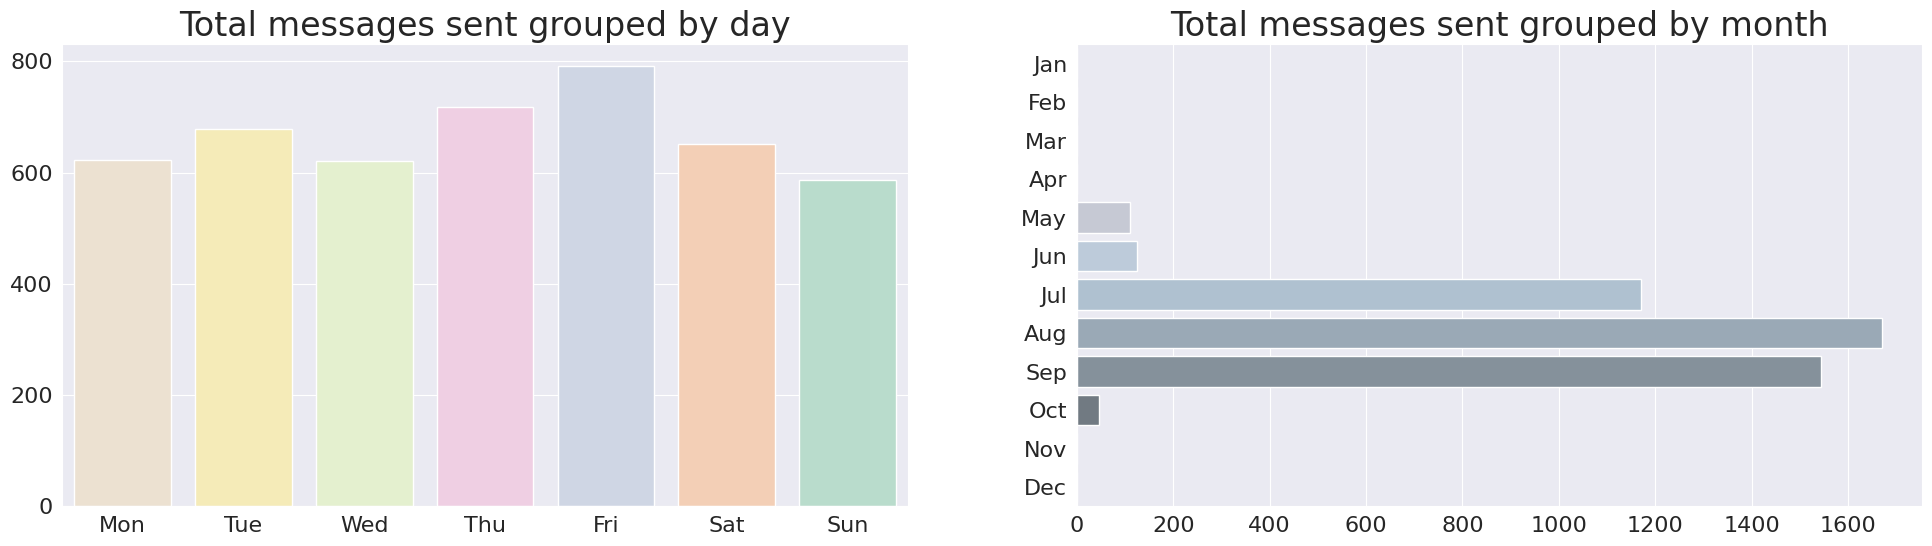

In [33]:
fig, axs = plt.subplots(1, 2, figsize = (24, 6))

matplotlib.rcParams['font.size'] = 20

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;

# PLOT 1: Messages grouped by weekday
sns.barplot(x=Days_Dict.keys(), y=Days_Dict.values(), order=Days_Dict.keys(), ax = axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')

# PLOT 2: Messages grouped by months
sns.barplot(y = Months_Dict.keys(), x=Months_Dict.values(), order = Months_Dict.keys(), ax = axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month');

# Saving the plots;
plt.savefig('days_and_month.svg', format = 'svg')

####Inference :
The Group is most active during fridays thats when the weekend starts so most of the students are travelling to different places for weekend

As we can see that the August is the most Busy month because thats when the semester starts.

##Objective 6 : Words used the most in Messages

In [36]:
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.Message.values:

    # typecaste each val to string.
    val = str(val)

    # split the value.
    tokens = val.split()

    # Converts each token into lowercase.
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words)

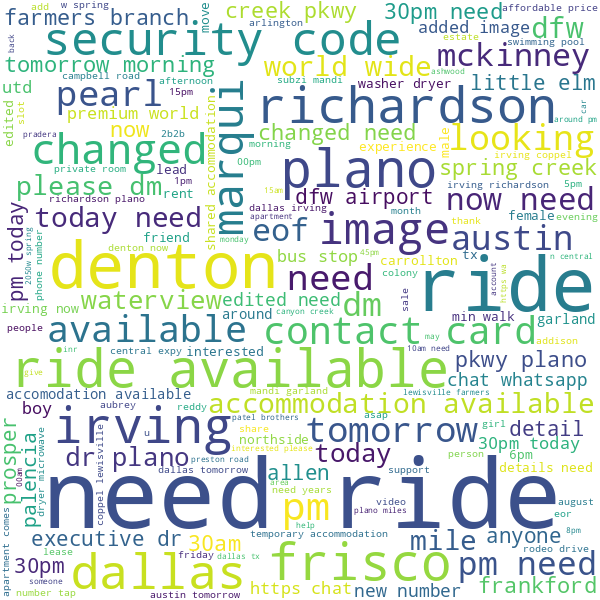

In [37]:
wordcloud.to_image()

##Objective 7 : Which Place is most Visited by Students?

In [51]:
word_frequencies = wordcloud.words_
# Print word frequencies
for word, freq in word_frequencies.items():
    print(f"{word}: {freq}")

need ride: 1.0
ride: 0.5664388762338648
denton: 0.39483675018982534
plano: 0.24753227031131358
ride available: 0.2437357630979499
frisco: 0.2384206529992407
irving: 0.2331055429005315
richardson: 0.22854973424449507
dallas: 0.21943811693242218
security code: 0.19514047076689445
image: 0.1776765375854214
marqui: 0.17615793470007593
changed: 0.1624905087319666
pm: 0.15034168564920272
contact card: 0.13591495823842065
available: 0.1313591495823842
tomorrow: 0.12300683371298406
need: 0.11996962794229309
pearl: 0.11769172361427487
looking: 0.10933940774487472
austin: 0.10554290053151101
dm: 0.09946848899012908
pm need: 0.09719058466211086
mckinney: 0.09187547456340167
eof: 0.09111617312072894
now need: 0.08428246013667426
dfw: 0.07593014426727411
accommodation available: 0.0683371298405467
today need: 0.06757782839787396
world wide: 0.06605922551252848
mile: 0.06529992406985573
please dm: 0.05998481397114654
today: 0.05694760820045558
dr plano: 0.05618830675778284
waterview: 0.0546697038724

In [57]:
#As we do not have a package to read names of places from text we have to manually create a dictionary
Place_Freq={'denton': 0.39483675018982534,'plano': 0.24753227031131358,'frisco': 0.2384206529992407,'irving': 0.2331055429005315,'richardson': 0.22854973424449507,'dallas': 0.21943811693242218,
            'marqui': 0.17615793470007593,'pearl': 0.11769172361427487,'austin': 0.10554290053151101,'mckinney': 0.09187547456340167,'dfw': 0.07593014426727411,
            'dr plano': 0.05618830675778284,'waterview': 0.05466970387243736,'farmers branch': 0.05315110098709187, 'pkwy plano': 0.05087319665907365, 'frankford': 0.05011389521640091,
            'spring creek': 0.04935459377372817, 'creek pkwy': 0.04935459377372817, 'little elm': 0.047076689445709946,'dfw airport': 0.0463173880030372,'allen': 0.04555808656036447,
             'executive dr': 0.04555808656036447, 'prosper': 0.04403948367501898, 'palencia': 0.040242976461655276, 'bus stop': 0.03492786636294609, 'utd': 0.03416856492027335,
            'garland': 0.03189066059225513,'northside': 0.029612756264236904, 'carrollton': 0.025816249050873197, 'irving now': 0.025816249050873197,'addison': 0.023538344722854973,
            'colony': 0.023538344722854973, 'arlington': 0.022779043280182234,'irving richardson': 0.022779043280182234, 'denton now': 0.02201974183750949, 'central expy': 0.02201974183750949,
            'aubrey': 0.02126044039483675, 'richardson plano': 0.02050113895216401, 'austin': 0.019741837509491267, 'w spring': 0.019741837509491267, 'campbell road': 0.019741837509491267,
            'dallas irving': 0.018223234624145785, 'irving coppel': 0.018223234624145785, 'coppel lewisville': 0.018223234624145785, 'dallas tomorrow': 0.018223234624145785,
            'subzi mandi': 0.017463933181473046, 'mandi garland': 0.017463933181473046, 'rodeo drive': 0.017463933181473046, 'patel brothers': 0.016704631738800303, 'canyon creek': 0.015945330296127564,
            'plano miles': 0.015945330296127564,'dallas tx': 0.015945330296127564, 'n central': 0.015945330296127564, 'lewisville farmers': 0.015945330296127564,
            'preston road': 0.015945330296127564, 'pradera': 0.015186028853454821, 'ashwood': 0.015186028853454821, 'ashwood': 0.015186028853454821, 'love field': 0.012908124525436599}

In [60]:
sorted_dict=dict(sorted(Place_Freq.items(), key=lambda item: item[1], reverse=True))
top10=dict(itertools.islice(sorted_dict.items(), 10))
top10

{'denton': 0.39483675018982534,
 'plano': 0.24753227031131358,
 'frisco': 0.2384206529992407,
 'irving': 0.2331055429005315,
 'richardson': 0.22854973424449507,
 'dallas': 0.21943811693242218,
 'marqui': 0.17615793470007593,
 'pearl': 0.11769172361427487,
 'mckinney': 0.09187547456340167,
 'dfw': 0.07593014426727411}

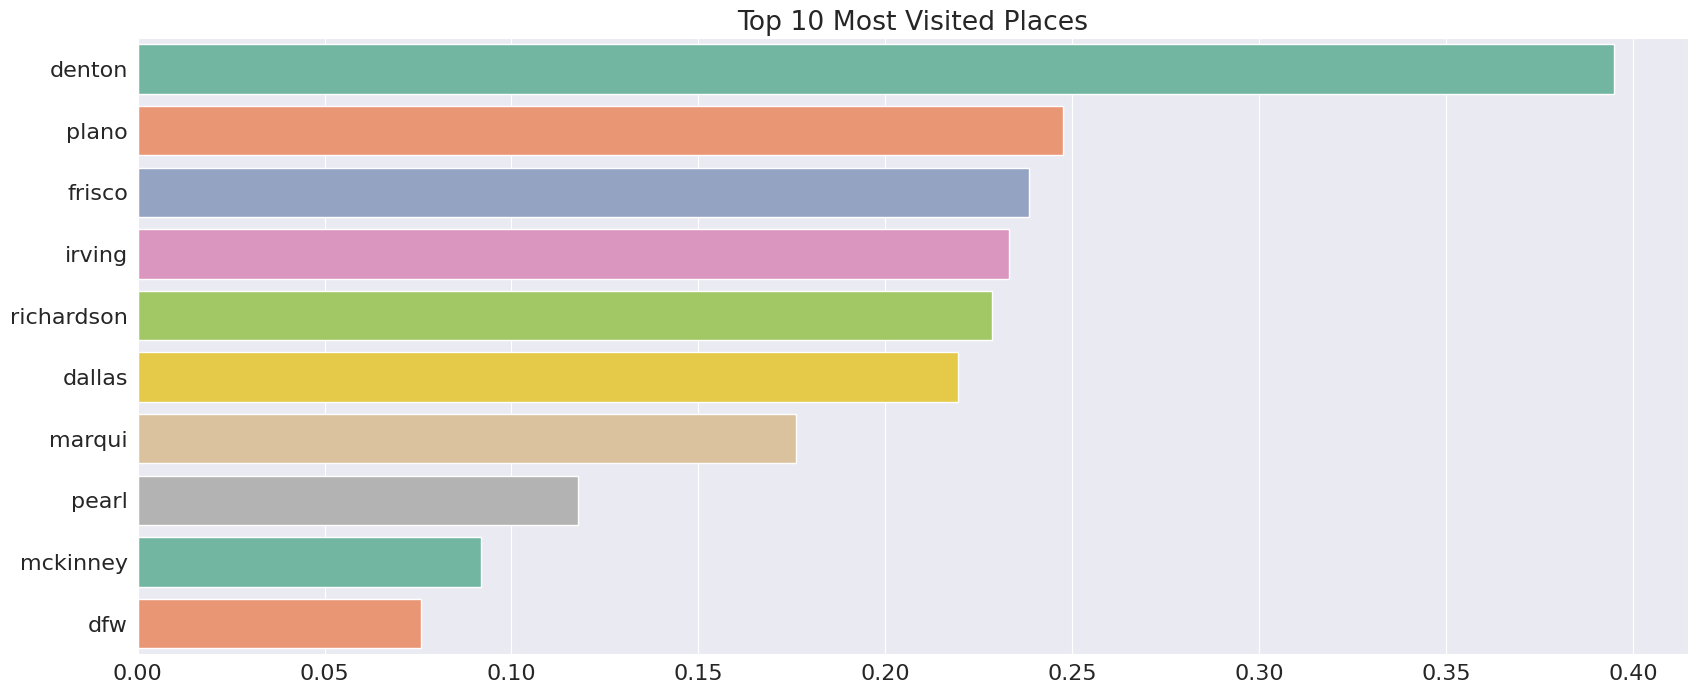

In [62]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x=top10.values(), y=top10.keys(),palette='Set2')
plt.title('Top 10 Most Visited Places');

# Saving the plots;
plt.savefig('most_visited_places.svg', format = 'svg')

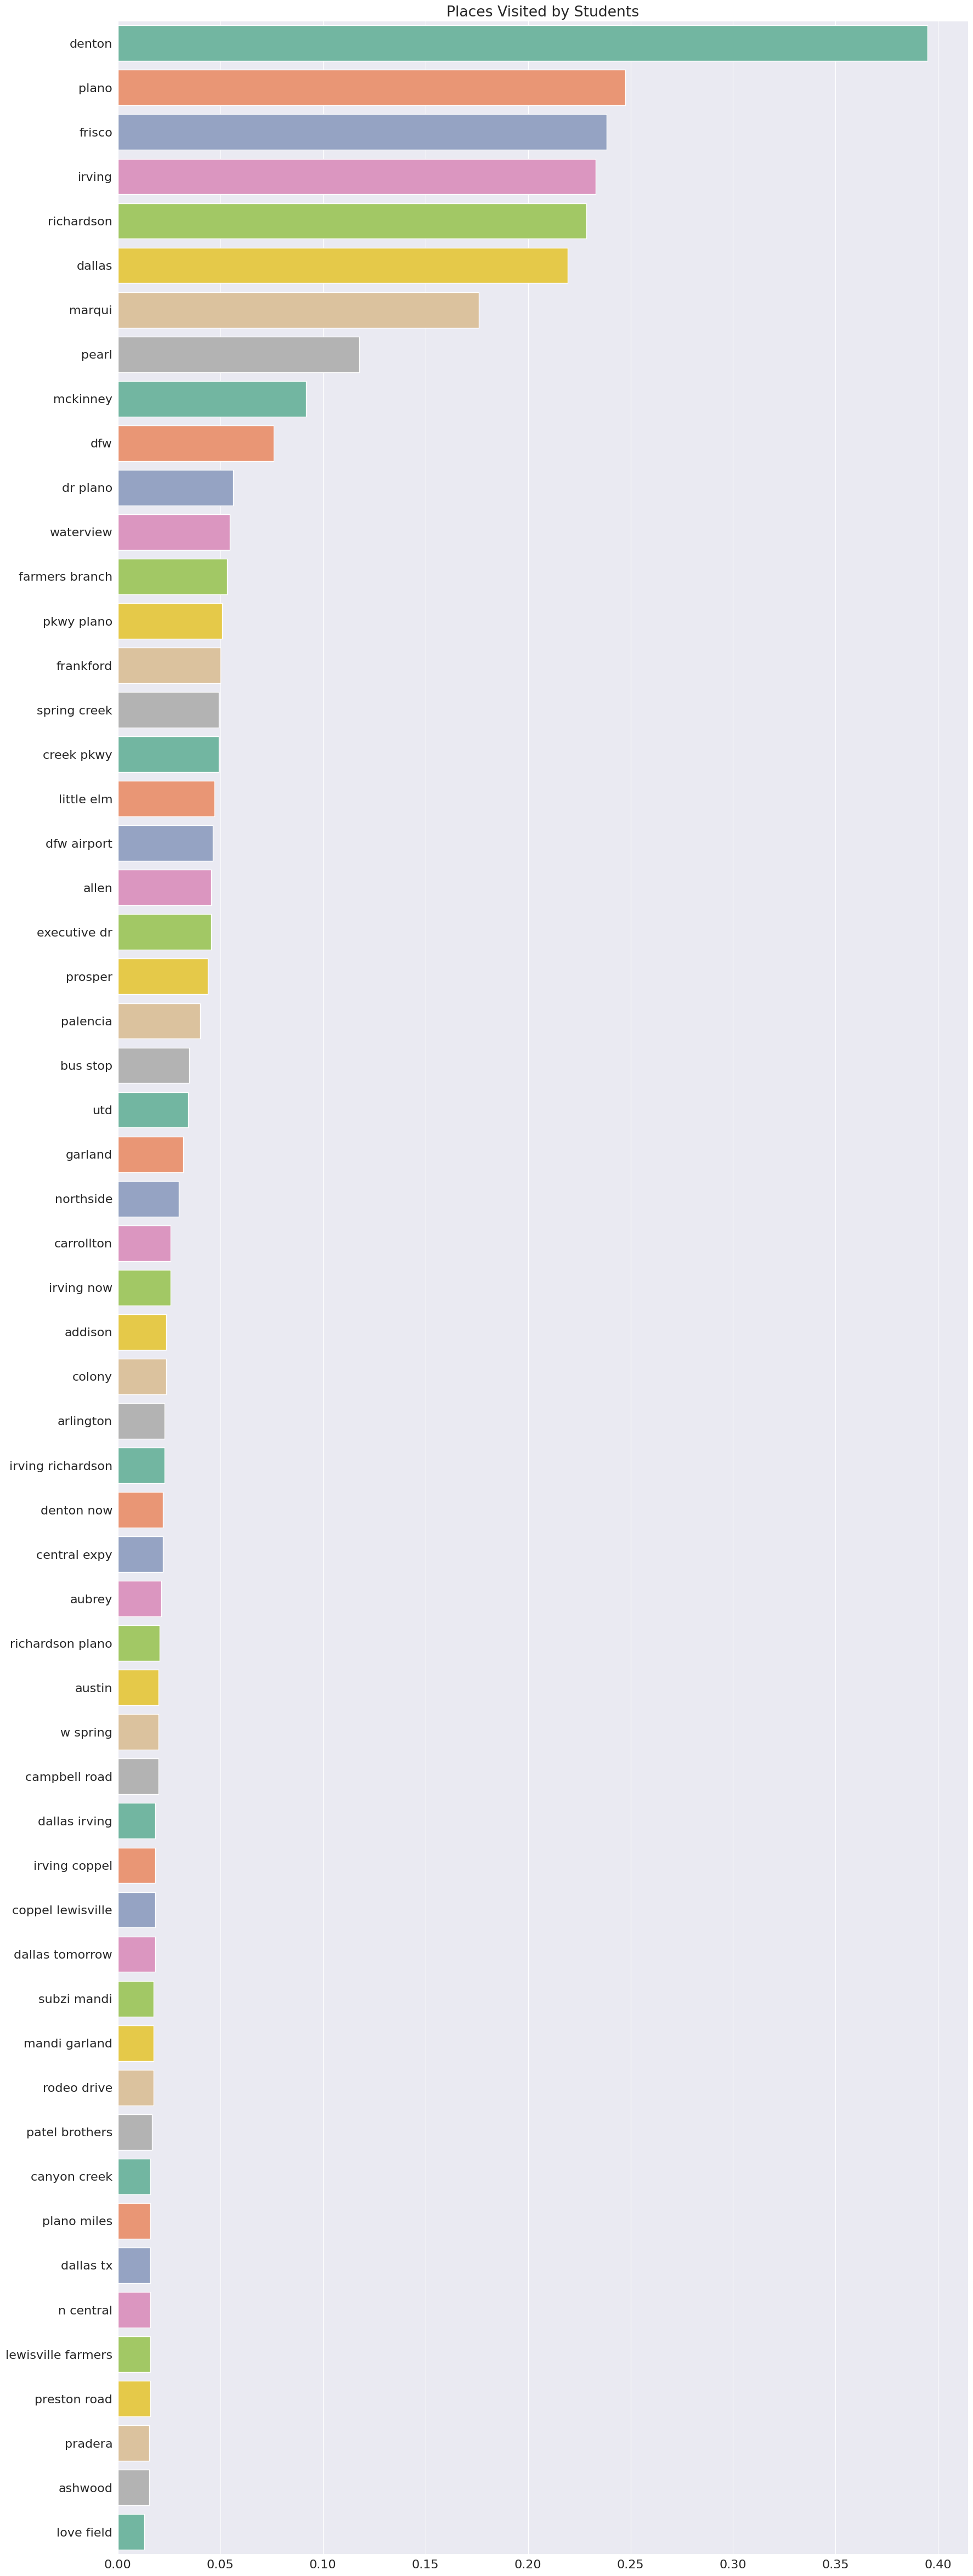

In [65]:
#Let's Plot for all the places.

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 60)

sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x=sorted_dict.values(), y=sorted_dict.keys(),palette='Set2')
plt.title('Places Visited by Students');

# Saving the plots;
plt.savefig('visited_places.svg', format = 'svg')

##Objective 8 : What else the group is used for?

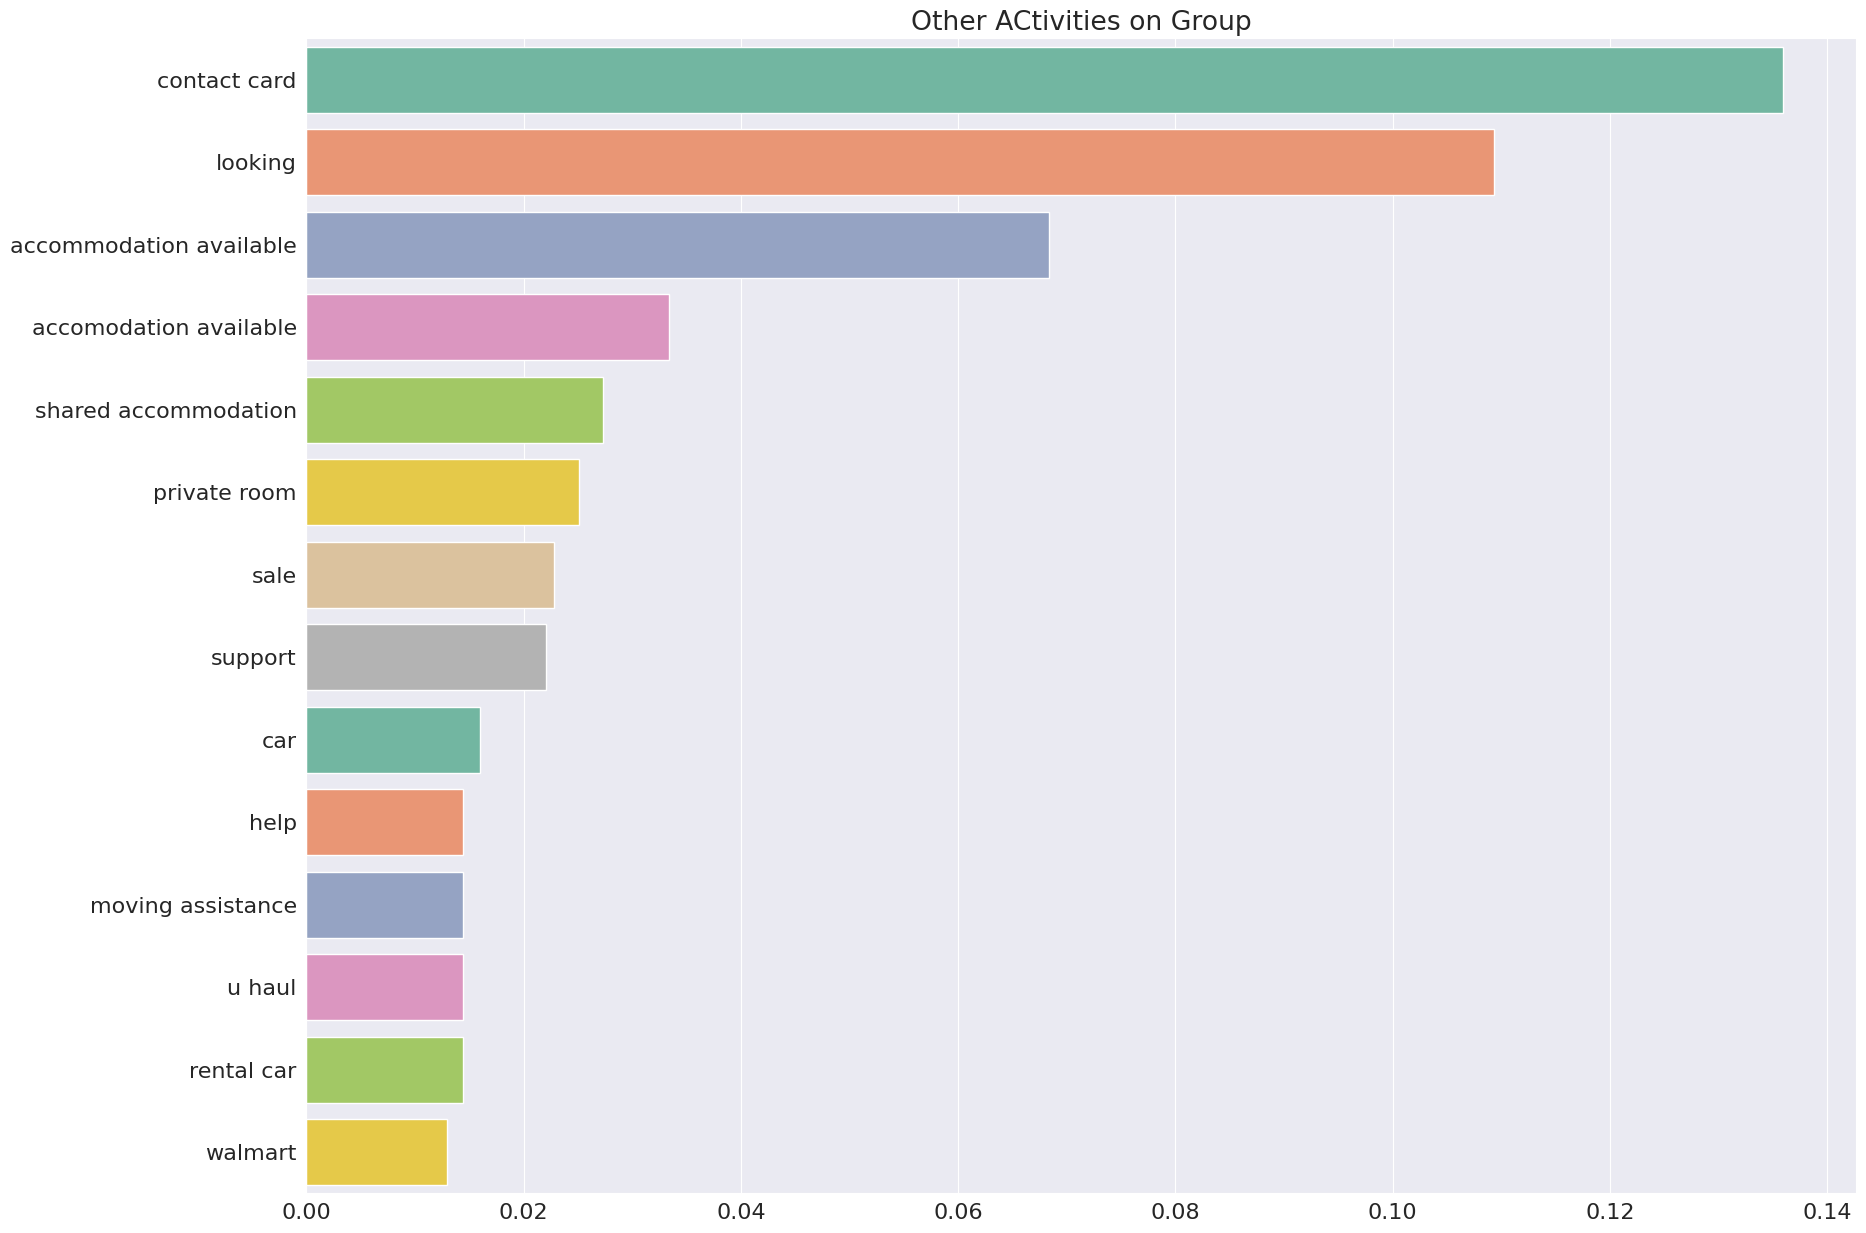

In [67]:
#As we have the word dictionary now, we can check what else the group is used for other than rides.
#Again as there is no way to find exact words, we need to manually enter the data.
Purpose={'contact card': 0.13591495823842065,'looking': 0.10933940774487472,'accommodation available': 0.0683371298405467,'accomodation available': 0.033409263477600606, 'shared accommodation': 0.02733485193621868,
         'private room': 0.025056947608200455, 'sale': 0.022779043280182234, 'support': 0.02201974183750949, 'car': 0.015945330296127564, 'help': 0.01442672741078208,
         'moving assistance': 0.01442672741078208, 'u haul': 0.01442672741078208,'rental car': 0.01442672741078208, 'walmart': 0.012908124525436599}

#Let's Plot for all the Reasons.

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 15)

sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x=Purpose.values(), y=Purpose.keys(),palette='Set2')
plt.title('Other ACtivities on Group');

# Saving the plots;
plt.savefig('other activities.svg', format = 'svg')

####We can see that other than the rides the group is mostly used for posting for Accomodations and availability for roommates.
####There are also some postings for U-Haul and Moving Assistance.

##Future Updates :

1.   Working with Right dataset : {As the data is exported by WhatsApp, with some new update the data integrity may be comprimised, as in this case where we are missing on the data from lots of users. I aim to work on this project again once we get the right data}.
2.   Using Machine learning algorithms for predicting peak hours and days in the future.
3. creating an automated function for deriving places from the text messages and calculating their frequency.
4. Using statistical analysis and NLP for automating the message sending process.

